# Tensorflow (TF) Primer
**References**
- https://github.com/hunkim/DeepLearningZeroToAll
- https://www.tensorflow.org/

## TF Mechanics
- TF is based on two fundamental elements: "graphs(operations)" and "sessions"
- In order to run computation on TF, one has to define graphs(i.e. operations) and open sessions
- Three steps of TF mechanics
    - Build graph using TF operations
    - Feed data & run graph (sess.run())
    - Update variables in the graph

![title](img/tf_mechanics.jpg)

## Linear Regression with TF
- Simple linear regression with one variable

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)    # for reproducibility

In [4]:
x_train = [1,2,3]
y_train = [1,2,3]

### Plotting x_train and y_train
- One could see that we could easily fit the straight line by setting (w,b) = (1,0)
- However, we want to see that if TF can figure it out

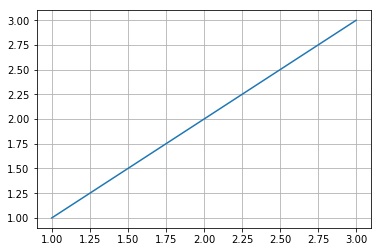

In [5]:
plt.plot(x_train, y_train)
plt.grid()
plt.show()

### Hypothesis
- Linear regression hypothesis: y = (x * W) + b

- In TF, Variable == 'learnable', or 'estimat-able'
- In other words, TF "estimates", or "learns" the values of the variables
- Not to be confused with placeholders!

In [6]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [7]:
hypothesis = x_train * W + b    # define the hypothesis

### Cost/loss minimization
- In this example, we minimize the cost(loss) with the Gradient Descent (GD) optimizer
- There are a number of optimizers in TF: https://www.tensorflow.org/api_guides/python/train

In [8]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))    # cost/loss function

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

### Running computations in a session
- In order to "implement", or "execute" a computation in TF, a session has to be operated
- Without sessions graphs(operations) are meaningless!
- use tf.Session() with the context manager (with ~ as ~)

In [11]:
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())    # variables should be initialized before training
    for step in range(2001):                       # 2000 steps(iterations) to train the model
        sess.run(train)
        if step%100 == 0:                          # for every 100 steps:
            print(step, sess.run(cost), sess.run(W), sess.run(b))     # print out current states

0 2.82329 [ 2.12867713] [-0.85235667]
100 0.113226 [ 1.39081788] [-0.88840771]
200 0.0699668 [ 1.30721486] [-0.69837117]
300 0.0432353 [ 1.24149871] [-0.54898357]
400 0.0267167 [ 1.18983996] [-0.4315508]
500 0.0165093 [ 1.14923155] [-0.33923826]
600 0.0102017 [ 1.11730957] [-0.26667204]
700 0.00630405 [ 1.0922159] [-0.20962858]
800 0.00389553 [ 1.07249022] [-0.16478711]
900 0.00240721 [ 1.05698395] [-0.12953788]
1000 0.0014875 [ 1.04479456] [-0.10182849]
1100 0.000919187 [ 1.03521252] [-0.08004645]
1200 0.000567998 [ 1.02768016] [-0.06292368]
1300 0.00035099 [ 1.02175927] [-0.04946378]
1400 0.000216891 [ 1.01710474] [-0.03888312]
1500 0.000134025 [ 1.01344585] [-0.03056567]
1600 8.28196e-05 [ 1.01056981] [-0.02402747]
1700 5.11766e-05 [ 1.00830877] [-0.01888768]
1800 3.16242e-05 [ 1.00653136] [-0.01484741]
1900 1.95421e-05 [ 1.00513422] [-0.01167146]
2000 1.20761e-05 [ 1.00403607] [-0.00917497]


### Result
After 2000 iterations, 
- Cost converges to zero (-> 1.20761e-05)
- W (slope) converges to 1 (-> 1.00403607)
- b (intercept) converges to 0 (-> -0.00917497)

## Logistic Regression with TF
- Logistic regression classification with TF

In [25]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)    # for reproducibility

In [26]:
x_data = np.array([[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]])
y_data = np.array([[0],[0],[0],[1],[1],[1]])

## Plotting x and y data
- Finding a line to segregate 0 (red) and 1 (blue)?

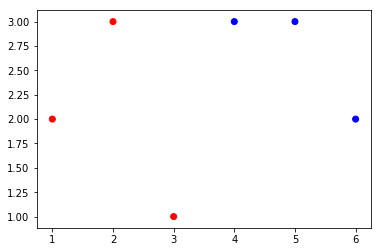

In [30]:
colors = []
for i in range(len(y_data)):
    if y_data[i][0] == 0:
        colors.append('red')
    else:
        colors.append('blue')
    
plt.scatter(x_data[:,0], x_data[:,1], c = colors)
plt.show()

### Placeholders for X and Y 
- With the predefined shape, one can feed changing data (variables), rather than immutable data
- With the feed_dict attribute in sess.run() function, one can input appropriate data
    - e.g. sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})

In [14]:
X = tf.placeholder(tf.float32, shape = [None, 2])    # n X 2 placeholder
Y = tf.placeholder(tf.float32, shape = [None, 1])    # n X 1 placeholder

### Hypothesis
- Logistic regression hypothesis: y = sigmoid(X * W + b)

In [15]:
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')    # as there are two x variables, shape of the weight is defined as (2,1)
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [16]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

### Cost/loss minimization
- GD optimizer is employed in this example as well

In [17]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))

In [18]:
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

### Accuracy computation
- 1.0 if all predictions are correct, 0.0 if all predictions are wrong
- Details
    - tf.cast() "casts a tensor to a new type" (https://www.tensorflow.org/api_docs/python/tf/cast)
    - tf.reduce_mean() "computes the mean of elements across dimensions of a tensor" (https://www.tensorflow.org/api_docs/python/tf/reduce_mean)
    - tf.equal() "returns the truth value of (x == y) element-wise" (https://www.tensorflow.org/api_docs/python/tf/equal)

In [19]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)    # 1 or 0 predictions
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

### Running computations in a session

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        cost_val, _ = sess.run([cost, train], feed_dict = {X: x_data, Y:y_data})
        if step % 100 == 0:
            print(step, cost_val)
            
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print('\nHypothesis: ', h, '\nPredicted (Y): ', p, '\nAccuracy: ', a)

0 2.06137
100 0.698592
200 0.642418
300 0.625484
400 0.61044
500 0.596732
600 0.584011
700 0.572044
800 0.560671
900 0.549781
1000 0.539294
1100 0.529156
1200 0.519326
1300 0.509774
1400 0.500479
1500 0.491424
1600 0.482596
1700 0.473986
1800 0.465585
1900 0.457387

Hypothesis:  [[ 0.20130855]
 [ 0.21162358]
 [ 0.76215398]
 [ 0.60394269]
 [ 0.7842257 ]
 [ 0.95094812]] 
Predicted (Y):  [[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]] 
Accuracy:  0.833333


### Results
- After 2000 iterations, cost(loss) is minimized to 0.457387
- Accuracy is 0.83333
- Actual & Predicted Y: 5 correct, 1 wrong (3rd place)
     - Actual: [0,0,0,1,1,1]
     - Predicted: [0,0,1,1,1,1]

## Feedforward Neural Network (NN) with TF
- Solving XOR problem with NN

In [21]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

In [45]:
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

### Plotting x and y data
- Can you find a "line" to segregate the red and the blue points?

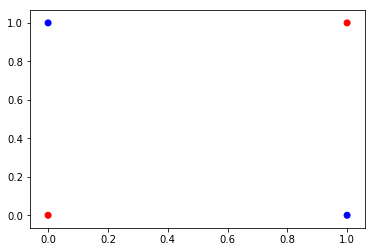

In [46]:
colors = []
for i in range(len(y_data)):
    if y_data[i][0] == 0:
        colors.append('red')
    else:
        colors.append('blue')
    
plt.scatter(x_data[:,0], x_data[:,1], c = colors)
plt.show()

### Placeholders for X and Y

In [47]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

### Hypothesis
- In this example, we create a shallow NN model with only one hidden layer
- Size of the hidden layer = 2, activation ftn = sigmoid

In [48]:
W1 = tf.Variable(tf.random_normal([2,2]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1)+ b1)    # first (and only) hidden layer

In [49]:
W2 = tf.Variable(tf.random_normal([2,1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')

In [50]:
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

### Cost(loss) minimization
- As it is a classification problem, cost ftn is similar to the one in the logistic regression example

In [51]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))

In [52]:
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

### Accuracy computation

In [53]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

### Running computations in a session
- Executing a computation is largely similar to former examples - just be aware of the shape of data!

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2000):
        sess.run(train, feed_dict = {X:x_data, Y:y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run([W1, W2]))
    
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print('\nHypothesis: ', h, '\nPredicted: ', p, '\nAccuracy: ', a)

0 0.704821 [array([[ 0.75958705,  1.16811538],
       [ 0.18156448,  0.45092812]], dtype=float32), array([[-0.31255046],
       [-0.66213959]], dtype=float32)]
100 0.698627 [array([[ 0.75695157,  1.159832  ],
       [ 0.17745894,  0.44448024]], dtype=float32), array([[-0.26980954],
       [-0.63131505]], dtype=float32)]
200 0.696064 [array([[ 0.75511611,  1.15352535],
       [ 0.17437398,  0.43997288]], dtype=float32), array([[-0.24192224],
       [-0.61108583]], dtype=float32)]
300 0.69499 [array([[ 0.75373149,  1.14844322],
       [ 0.17187506,  0.43666542]], dtype=float32), array([[-0.22356236],
       [-0.59760904]], dtype=float32)]
400 0.694526 [array([[ 0.7526114 ,  1.1441344 ],
       [ 0.16972569,  0.43411994]], dtype=float32), array([[-0.21130335],
       [-0.58844316]], dtype=float32)]
500 0.694314 [array([[ 0.75165236,  1.14032376],
       [ 0.16779232,  0.43207178]], dtype=float32), array([[-0.20295157],
       [-0.58203918]], dtype=float32)]
600 0.694204 [array([[ 0.750795

### Results
- After 2000 iterations, cost is not much reduced (0.704821 -> 0.693739)
- Followingly, accuracy is merely 0.5
- Unsatisfied? Try with more iterations (>10000)

## CNN with TF - Basics
- CNN: the current state-of-the-art model architecture for image classification tasks( + alpha)

### Components of CNN
- Convolutional layers: a specified number of convolution filters are applied to the image. Then, the layer performs a set of mathematical operations for each subregion to produce a single value in the output feature map.
- Pooling layers: downsample the image data extracted by the convolutional layers to reduce the dimensionality of the feature map to decrease processing time. A commonly used pooling algorithm is max poooling.
- Fully connected layers: perform classification of the features extracted by the convolutional layers and downsampled by the pooling layers. Every node in the layer is connected to every node in the preceding layer

![title](img/cnn.png)

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Creating an image

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)    # create 1 X 3 X 3 size image
print(image.shape)

(1, 3, 3, 1)


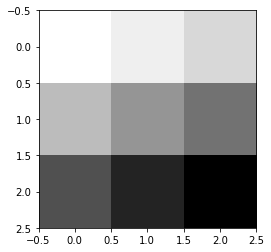

In [4]:
plt.imshow(image.reshape(3,3), cmap = 'Greys')

### tf.nn.conv2d
- conv2d: computes a 2-D convolution given 4-D input and filter tensors
- **tf.nn.conv2d**(input, filter, strides, padding, ...)
    - **Input: ** Batch size X Height X Width X Input Channels
    - **Filter: ** Height X Width X Input Channels X Output Channels
    - **Strides: ** 4 element 1-D tensor, strides in each direction
    - **Padding: **
        - "VALID": drops the right-most columns (or bottom-most rows)
        - "SAME": tries to pad evenly left and right
        - https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

### Conv. layer with 1 Filter ((2,2,1,1)) with padding = 'VALID'

![title](img/conv1.jpg)

In [5]:
weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print('filter shape: ', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'VALID')
conv2d_img = conv2d.eval()
print('conv2d_img shape:', conv2d_img.shape)

filter shape:  (2, 2, 1, 1)
conv2d_img shape: (1, 2, 2, 1)


[[ 12.  16.]
 [ 24.  28.]]


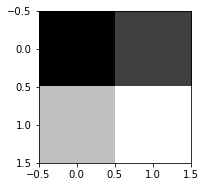

In [6]:
# operations to visualize the convolutional layer created
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):    
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap = 'gray')

### Conv. layer with 1 filter ((2,2,1,1)) with padding = 'SAME'

![title](img/conv2.jpg)

In [25]:
weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print('filter shape: ', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
conv2d_img = conv2d.eval()
print('conv2d_img shape:', conv2d_img.shape)

filter shape:  (2, 2, 1, 1)


NameError: name 'image' is not defined

[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


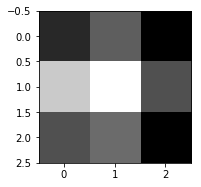

In [8]:
# operations to visualize the convolutional layer created
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):    
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap = 'gray')

### Conv. layer with 3 filters ((2,2,1,3)) with padding = 'SAME'

In [9]:
weight = tf.constant([[[[1., 10., -1]],[[1., 10., -1.]]], [[[1., 10., -1.]],[[1., 10., -1]]]])    # 3 filters = 3 output channels
print('filter shape: ', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
conv2d_img = conv2d.eval()
print('conv2d_img shape: ', conv2d_img.shape)

filter shape:  (2, 2, 1, 3)
conv2d_img shape:  (1, 3, 3, 3)


[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


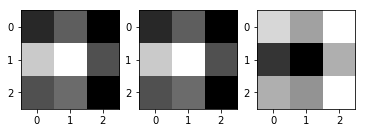

In [25]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### Max pooling
- max_pool: performs the max pooling on the input
- **tf.nn.max_pool**(value, ksize, strides, padding, ...)
    - **value**: [Batch size X Height X Width X Channels]
    - **ksize**: The size of the window for each dimension of the input tensor (a list of ints that has length >= 4)
    - **strides**: The stride of the sliding window for each dimension of the input tensor (a list of ints that has length >= 4)

![title](img/max_pool.png)

In [13]:
image = np.array([[[[4],[3]], [[2],[1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'VALID')    # 2X2 filter

In [14]:
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


### Max pooling with zero paddings

![title](img/max_pool2.png)

In [15]:
image = np.array([[[[4],[3]], [[2],[1]]]], dtype = np.float32)
pool= tf.nn.max_pool(image, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')

In [16]:
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


### TF layers
- tf.layers: high-level neural networks layers
- Easy to construct layers using layers module
- https://www.tensorflow.org/api_docs/python/tf/layers

In [ ]:
# layers example
conv1 = tf.layers.conv2d(inputs = X_img, filters = 32, kernel_size = [3,3], padding = 'SAME', activation = tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs = conv1, pool_size = [2,2], padding = 'SAME', strides = 2)
dropout1 = tf.layers.dropout(inputs = pool1, rate = 0.7, training = self.training)

### Convolution & Max pooling on MNIST Data
- https://www.tensorflow.org/get_started/mnist/beginners

![title](img/MNIST-Matrix.png)

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
img = mnist.train.images[0]
img.shape    # original data with shape (784, )

(784,)

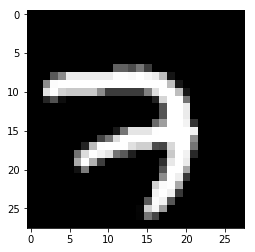

In [23]:
img = img.reshape(28, 28)
plt.imshow(img, cmap = 'gray')

In [25]:
sess = tf.InteractiveSession()

img = img.reshape(-1, 28, 28, 1)
img.shape

(1, 28, 28, 1)

In [29]:
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev = 0.01))     # 3 X 3 filter
conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding = 'SAME')
print(conv2d)

Tensor("Conv2D_5:0", shape=(1, 14, 14, 5), dtype=float32)


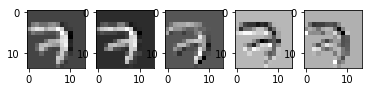

In [27]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

In [30]:
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
print(pool)

Tensor("MaxPool_3:0", shape=(1, 7, 7, 5), dtype=float32)


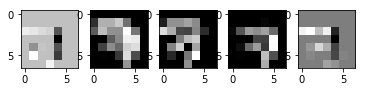

In [31]:
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

## RNN with TF - basics
- RNN: popular model that has shown great promise in may NLP tasks

### RNN structure
- RNNs are called recurrent since they perform the same task for every element of a sequence, with the output being depended on the previous computations
- They have a "memory" which captures information about what has been calculated so far

![title](img/rnn.jpg)

### Applications of RNN
- Language modeling and generating text
- Machine translation
- Speech recognition
- Generating image descriptions

In [22]:
import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
tf.reset_default_graph()
sess = tf.InteractiveSession()

### Creating RNN cell
- TF provides a number of RNN cells to implement. LSTMCell is the most popular one
    - **tf.contrib.rnn.BasicRNNCell**(num_units)
    - **tf.contrib.rnn.BasicLSTMCell**(num_units)
    - **tf.contrib.rnn.GRUCell**(num_units)

In [23]:
cell = rnn.BasicRNNCell(num_units = 3)    # hidden size = 3

### Creating a recurrent neural network (RNN)
- **tf.nn.dynamic_rnn**(cell, inputs)
    - cell: an instance of RNNCell
    - inputs: the RNN inputs

In [24]:
input_data = np.array([[[1,0,0,0]]], dtype = np.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, input_data, dtype = tf.float32)
sess.run(tf.global_variables_initializer())
print(outputs.eval())    # output size of (1,1,3)

[[[ 0.47147113 -0.57882524  0.62443161]]]
